### Machine Learning Prep

In [1]:
# Dependencies

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [2]:
# Read the CSV file created in Tableau Prep for Machine Learning 
GRTC_Ridership_df = pd.read_csv('..\Tableau Prep Output\ML_Plot_May_2019.csv')
GRTC_Ridership_df.dtypes

TRIPS_COUNT              int64
AVG_SERVICED           float64
MAX_LOAD                 int64
AVG_PASSENGER_MILES    float64
AVG_SEGMENT_MILES      float64
SERVICE_TYPE            object
dtype: object

In [3]:
GRTC_Ridership_df.head()

,TRIPS_COUNT,AVG_SERVICED,MAX_LOAD,AVG_PASSENGER_MILES,AVG_SEGMENT_MILES,SERVICE_TYPE
0,9,0.000,2,0.240572,0.270644,Local
1,9,0.000,2,0.275926,0.310417,Local
2,9,0.222,3,0.109007,0.098106,Local
3,9,0.333,4,0.398885,0.211174,Local
4,9,0.000,4,0.213931,0.113258,Local


In [4]:
GRTC_Ridership_df.shape

(25400, 6)

In [5]:
GRTC_Ridership_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25400 entries, 0 to 25399
Data columns (total 6 columns):
TRIPS_COUNT            25400 non-null int64
AVG_SERVICED           25400 non-null float64
MAX_LOAD               25400 non-null int64
AVG_PASSENGER_MILES    25400 non-null float64
AVG_SEGMENT_MILES      25400 non-null float64
SERVICE_TYPE           25400 non-null object
dtypes: float64(3), int64(2), object(1)
memory usage: 1.2+ MB


In [6]:
GRTC_Ridership_df['SERVICE_TYPE'].value_counts() #The result below indicates stratefication is necessary

Local      19956
Express     5444
Name: SERVICE_TYPE, dtype: int64

In [7]:
GRTC_Ridership_df.describe()

,TRIPS_COUNT,AVG_SERVICED,MAX_LOAD,AVG_PASSENGER_MILES,AVG_SEGMENT_MILES
count,25400.000000,25400.000000,25400.000000,25400.000000,25400.000000
mean,69.981339,0.128773,15.625906,4.012667,0.286246
std,125.826486,0.205553,10.524928,32.558120,1.333106
min,2.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,10.000000,0.971267,0.000000
50%,24.000000,0.046000,13.000000,1.042808,0.106250
75%,78.000000,0.160000,17.000000,2.000000,0.252083
max,1819.000000,1.000000,75.000000,967.000000,24.444318


In [8]:
Grouped_Avg_Seg_Mi_by_Service_type_df = GRTC_Ridership_df.groupby(['SERVICE_TYPE'])[['AVG_SEGMENT_MILES']].mean()
Grouped_Avg_Seg_Mi_by_Service_type_df

,AVG_SEGMENT_MILES
SERVICE_TYPE,
Express,0.666177
Local,0.182601


In [9]:
Grouped_Avg_Pass_Mi_by_Service_type_df = GRTC_Ridership_df.groupby(['SERVICE_TYPE'])[['AVG_PASSENGER_MILES']].mean()
Grouped_Avg_Pass_Mi_by_Service_type_df

,AVG_PASSENGER_MILES
SERVICE_TYPE,
Express,12.239900
Local,1.768276


In [10]:
Grouped_Avg_Serviced_by_Service_type_df = GRTC_Ridership_df.groupby(['SERVICE_TYPE'])[['AVG_SERVICED']].mean()
Grouped_Avg_Serviced_by_Service_type_df 

,AVG_SERVICED
SERVICE_TYPE,
Express,0.110021
Local,0.133888


In [11]:
Grouped_Max_Load_by_Service_type_df = GRTC_Ridership_df.groupby(['SERVICE_TYPE'])[['MAX_LOAD']].mean()
Grouped_Max_Load_by_Service_type_df

,MAX_LOAD
SERVICE_TYPE,
Express,22.025716
Local,13.880036


In [12]:
Grouped_Trips_Count_by_Service_type_df = GRTC_Ridership_df.groupby(['SERVICE_TYPE'])[['TRIPS_COUNT']].mean()
Grouped_Trips_Count_by_Service_type_df

,TRIPS_COUNT
SERVICE_TYPE,
Express,67.698016
Local,70.604229


<function matplotlib.pyplot.show(*args, **kw)>

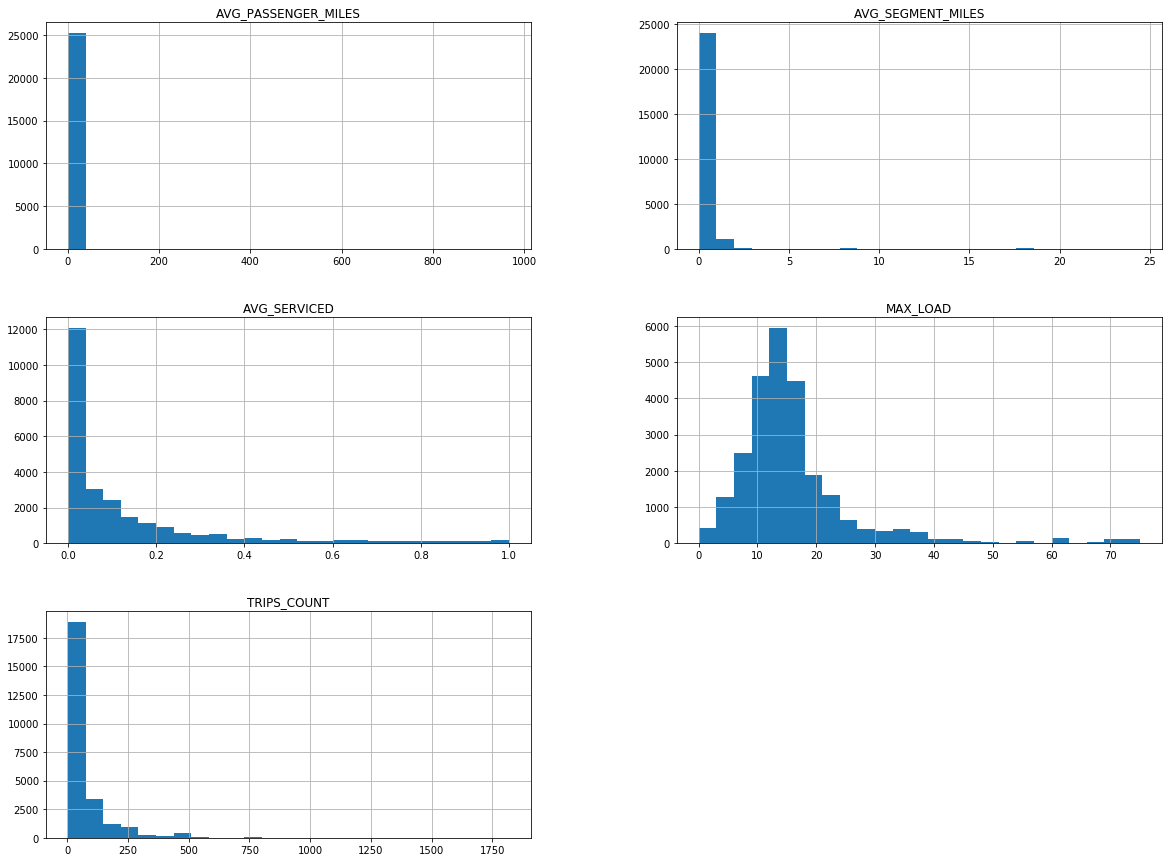

In [30]:
GRTC_Ridership_df.hist(bins=25, figsize=(20,15))
plt.show 

## Supervised Machine Learning for Predicting Classes - Classification


### Logistics Regression

In [14]:
# Assign X (data) and y (target)
X = GRTC_Ridership_df.drop("SERVICE_TYPE", axis=1)
y = GRTC_Ridership_df["SERVICE_TYPE"]
print(X.shape, y.shape)

(25400, 5) (25400,)


In [15]:
# Split data inot training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, stratify=y)

In [16]:
# Create a Logistics Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8186351706036745
Testing Data Score: 0.8198425196850394


In [19]:
# Make predictions
predictions = classifier.predict(X_test)
print(f"First 10 Predictions: {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions: ['Local' 'Express' 'Local' 'Local' 'Local' 'Local' 'Local' 'Local' 'Local'
 'Local']
First 10 Actual labels: ['Express', 'Local', 'Express', 'Express', 'Local', 'Express', 'Express', 'Local', 'Local', 'Local']


In [20]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Local,Express
1,Express,Local
2,Local,Express
3,Local,Express
4,Local,Local
5,Local,Express
6,Local,Express
7,Local,Local
8,Local,Local
9,Local,Local


### K Nearest Neighbors (KNN)

In [21]:
# Dependencies
from sklearn.neighbors import KNeighborsClassifier

In [25]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train.values.reshape(-1, 1))

In [26]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.988/0.966
k: 3, Train/Test Score: 0.981/0.957
k: 5, Train/Test Score: 0.970/0.955
k: 7, Train/Test Score: 0.964/0.948
k: 9, Train/Test Score: 0.958/0.946
k: 11, Train/Test Score: 0.955/0.944
k: 13, Train/Test Score: 0.950/0.940
k: 15, Train/Test Score: 0.947/0.939
k: 17, Train/Test Score: 0.944/0.939
k: 19, Train/Test Score: 0.941/0.938
k: 21, Train/Test Score: 0.938/0.935
k: 23, Train/Test Score: 0.936/0.933
k: 25, Train/Test Score: 0.934/0.932
k: 27, Train/Test Score: 0.931/0.930
k: 29, Train/Test Score: 0.926/0.926
k: 31, Train/Test Score: 0.925/0.924
k: 33, Train/Test Score: 0.923/0.922


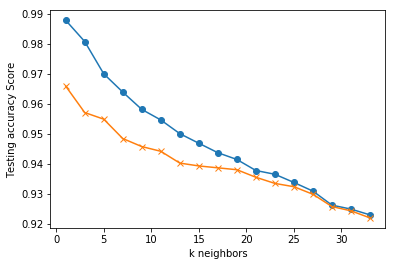

In [33]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 35, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 35, 2), train_scores, marker='o')
plt.plot(range(1, 35, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [38]:
# Note that k:27 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train_scaled, y_train)
print('k=23 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=23 Test Acc: 0.933


In [39]:
new_route_data = [[69, .15, 10, 5, .25]]
predicted_class = knn.predict(new_route_data)
print(predicted_class)

['Local']


### Support Vector Machine (SVM)

In [41]:
# Using the same X and y data from above refine for use with SVM
target = GRTC_Ridership_df["SERVICE_TYPE"]
target_names = ["local", "express"]

In [42]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [44]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.808


In [45]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["local", "express"]))

              precision    recall  f1-score   support

       local       0.94      0.11      0.20      1361
     express       0.80      1.00      0.89      4989

    accuracy                           0.81      6350
   macro avg       0.87      0.55      0.54      6350
weighted avg       0.83      0.81      0.74      6350

